![](https://images.pexels.com/photos/1827354/pexels-photo-1827354.jpeg?auto=compress&cs=tinysrgb&h=750&w=1260)

# Filtering

Kevin J. Walchko, Phd

30 Nov 2019

---

Here are some notes on various types of filters

## IIR

## FIR

## FIR vs IIR

- IIR typicall are lower order than FIR for the same requirements
- IIR have a nonlinear phase response

# Types


## Butterworth

- Flat Passband
- Monotonic roll off rate of 20 dB per order
- Generally need high order filter to have a steep roll-off

## Chebyshev

- Type 1: Ripple in passband
- Type 2: Ripple in stopband
- Higher ripple results in sharper attenuate at cutoff frequency
- Chebyshev filter has sharper attenuate at the cutoff frequency than Butterworth of the same order
- Poor group delay

## Elliptic

- Stepest cut-off slope of any other filter
- Ripple in both passband and stopband

# FIR vs IIR

## FIR

FIR filtering has these advantages over IIR filtering:

1. It can implement linear-phase filtering. This means that the filter has no phase shift across the frequency band. Alternately, the phase can be corrected independently of the amplitude.
1. It can be used to correct frequency-response errors in a loudspeaker to a finer degree of precision than using IIRs.
1. However, FIRs can be limited in resolution at low frequencies, and the success of applying FIR filters depends greatly on the program that is used to generate the filter coefficients. Usage is generally more complicated and time-consuming than IIR filters.

FIR filters are more powerful than IIR filters, but also require more processing power and more work to set up the filters. They are also less easy to change "on the fly" as you can by tweaking (say) the frequency setting of a parametric (IIR) filter. However, their greater power means more flexibility and ability to finely adjust the response of your active loudspeaker.

## IIR

The main advantage digital IIR filters have over FIR filters is their efficiency in implementation, in order to meet a specification in terms of passband, stopband, ripple, and/or roll-off. Such a set of specifications can be accomplished with a lower order (Q in the above formulae) IIR filter than would be required for an FIR filter meeting the same requirements.

- [Wikipedia IIR](https://en.wikipedia.org/wiki/Infinite_impulse_response)
- [miniDSP](https://www.minidsp.com/applications/dsp-basics/fir-vs-iir-filtering)

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from numpy import pi

In [43]:
# order = 2
# Apass = 0.005  # dB

# fs = 20     # samples/sec
# # wn = 0.5    # normalized drop below Apass rads/sample, wn=1 is nyquist
# fc = 9
# wn = fc/(fs/2)
# print("Sample freq [samp/sec]: {:.2f}".format(fs))
# print("Nyquist freq [samp/sec]: {:.2f}".format(fs/2))
# print("Cutoff freq [rad/sec]: {:.2f}".format(wn*fs/2))
# print("Wn: {:.2f}".format(wn))

# b, a = signal.cheby1(order, Apass, wn, btype='low', analog=False)
# # b, a = signal.cheby1(6,10,0.6)
# print('Coefficients:')
# print('  b: {}'.format(b))
# print('  a: {}'.format(a))

In [73]:
def plot(b, a, title, fs):
    print('Coefficients:')
    print('  b: {}'.format(b))
    print('  a: {}'.format(a))
    
    w, h = signal.freqz(b, a)

    plt.subplot(2,1,1)
    plt.plot(0.5*fs*w/np.pi, 20*np.log10(np.abs(h)))
    # plt.plot(w/pi, 20*np.log10(np.abs(h)))
    # plt.axvline(fcut, color='r', alpha=0.2)
    # plt.plot([0, fcut], [-Apass, -Apass], color='r', alpha=0.2)
    # plt.xlim(0, wn*fs)  # look out to nyquist
    # plt.ylim(-3, Apass) # look from -3dB to max pass ripple
#     plt.ylim(-9, 1.1)
    # plt.xlabel('Frequency (rad/sec)')
    # plt.xlabel('Normalized Frequency [rad/sec] (1.0 = Nyquist)')
#     plt.axvline(fc, color='r', alpha=0.2)
    plt.ylabel('Gain [dB]')
    plt.grid()
    plt.title(title)
    plt.tight_layout()

    plt.subplot(2,1,2)

    plt.plot(0.5*fs*w/np.pi, np.rad2deg(np.unwrap(np.angle(h))))
    # plt.plot(w/pi, np.rad2deg(np.unwrap(np.angle(h))))
#     plt.axvline(fc, color='r', alpha=0.2)
    plt.grid(True)
#     plt.xlabel('Normalized Frequency [rad/sec] (1.0 = Nyquist)')
    plt.xlabel('Frequency [rad/sec]')
    plt.ylabel('Phase [degrees]');

In [104]:
filter_order = 4
freq_sample = 20
Wn = 0.9
rp = 0.5  # passband ripple
As = 20  # attenuation stopband

Coefficients:
  b: [0.66201584 2.64806335 3.97209502 2.64806335 0.66201584]
  a: [1.         3.18063855 3.86119435 2.11215536 0.43826514]


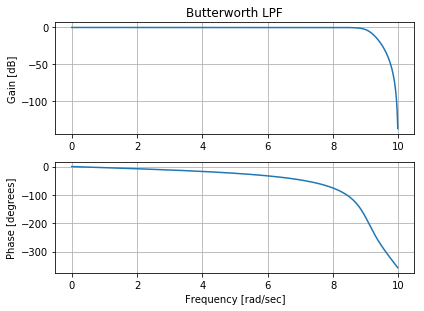

In [105]:
b, a = signal.butter(filter_order, Wn)
plot(b,a, "Butterworth LPF", freq_sample)

Coefficients:
  b: [0.60660015 2.42640061 3.63960091 2.42640061 0.60660015]
  a: [1.         3.10041384 3.71564646 2.03140007 0.43323516]


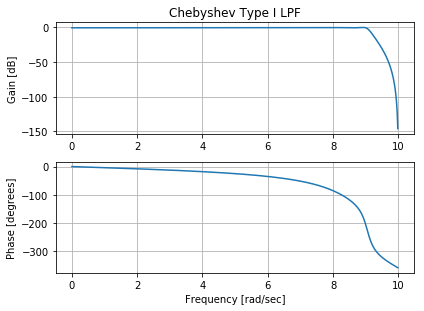

In [106]:
b, a = signal.cheby1(filter_order, rp, Wn)
plot(b,a, "Chebyshev Type I LPF", freq_sample)

Coefficients:
  b: [0.71482732 2.78890357 4.14903008 2.78890357 0.71482732]
  a: [1.         3.24462449 4.07165544 2.32923352 0.51097839]


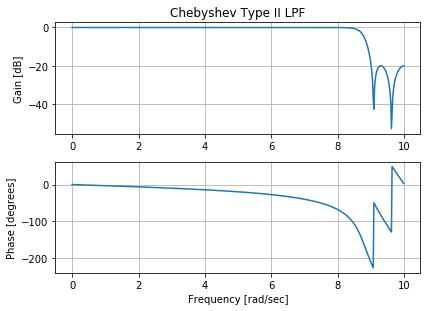

In [107]:
b, a = signal.cheby2(filter_order, As, Wn)
plot(b,a, "Chebyshev Type II LPF", freq_sample)

Coefficients:
  b: [0.61341856 2.45367425 3.68051137 2.45367425 0.61341856]
  a: [1.         3.05891184 3.5476732  1.84534851 0.36276344]


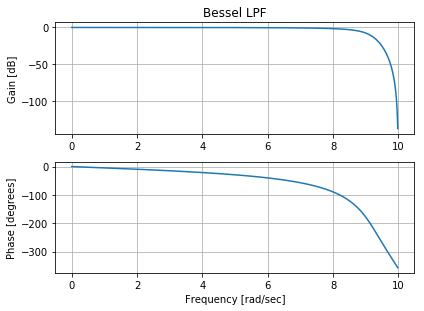

In [108]:
b, a = signal.bessel(filter_order, Wn)
plot(b,a, "Bessel LPF", freq_sample)

Coefficients:
  b: [0.73113228 2.85756023 4.25390787 2.85756023 0.73113228]
  a: [1.         3.39205462 4.44595767 2.65700428 0.613623  ]


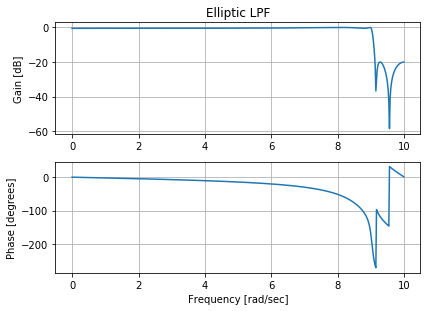

In [109]:
b, a = signal.ellip(filter_order, rp, As, Wn)
plot(b,a, "Elliptic LPF", freq_sample)

# Other

Text(0,0.5,'Amplitude [dB]')

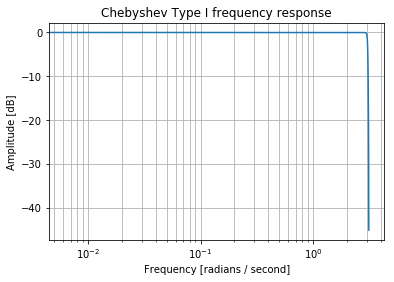

In [142]:
plt.semilogx(w, 20*np.log10(abs(h)))
plt.grid(which='both', axis='both')
# plt.ylim(-3, Apass)
plt.title('Chebyshev Type I frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')

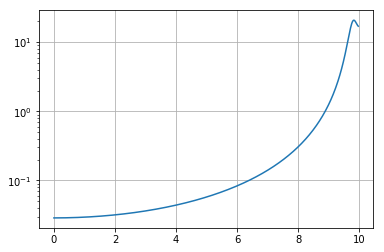

In [143]:
group_delay = -np.diff(np.unwrap(np.angle(h))) / np.diff(w)
xx=0.5*fs*w/np.pi
plt.semilogy(xx[:-1],group_delay)
plt.grid(True)